In [1]:
import warnings
warnings.filterwarnings('ignore')

#importamos librerías clásicas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


#importamos statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf


# 2 - Analiza el dataset caudal_extra.csv. ¿Qué puedes decir de los datos, distribuciones, missing, u otros? ¿Hay algo que te llame la atención? ¿Por qué hay tantos valores missing? Pensar en la manera en que se elaboró el dataset, descrito más arriba. (Entregable: texto/imágenes)

In [2]:
df = pd.read_csv('caudal_extra.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.00,NaN
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.00,NaN
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.00,NaN
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.00,NaN
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411175,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-10 00:00:00+00:00,46.885,7322001,Rio Maule En Longitudinal,0.00,12.975000
1411176,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-14 00:00:00+00:00,195.978,7322001,Rio Maule En Longitudinal,0.00,22.665714
1411177,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-04 00:00:00+00:00,124.327,7322001,Rio Maule En Longitudinal,1.91,20.757143
1411178,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-29 00:00:00+00:00,23.682,7322001,Rio Maule En Longitudinal,0.00,27.598333


In [4]:
df.shape

(1411180, 16)

In [5]:
df.isna().sum()

codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
dtype: int64

In [6]:
df[df['codigo_estacion'] == 4540001]['temp_max_promedio'].isna().value_counts()

False    4800
True      988
Name: temp_max_promedio, dtype: int64

In [7]:
df['caudal'].describe()

count    1.411180e+06
mean     9.552229e+01
std      2.526337e+02
min      0.000000e+00
25%      1.250000e+00
50%      8.950000e+00
75%      6.970000e+01
max      1.580500e+04
Name: caudal, dtype: float64

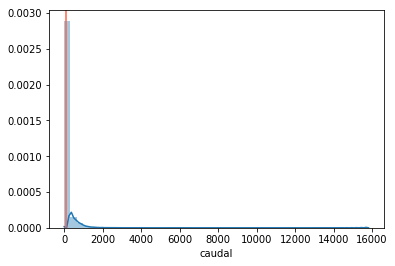

In [9]:
sns.distplot(df['caudal'].dropna())
plt.axvline(np.mean(df['caudal']), color='tomato')

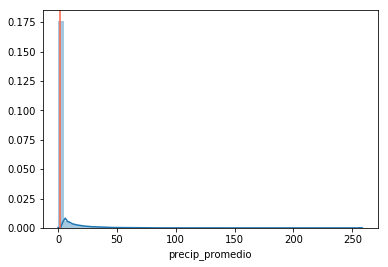

In [10]:
sns.distplot(df['precip_promedio'].dropna())
plt.axvline(np.mean(df['precip_promedio']), color='tomato')

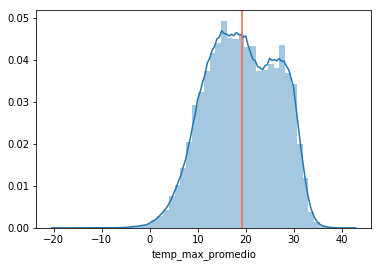

In [11]:
sns.distplot(df['temp_max_promedio'].dropna())
plt.axvline(np.mean(df['temp_max_promedio']), color='tomato')

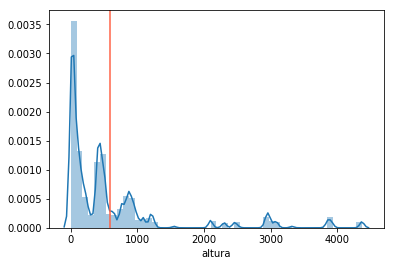

In [12]:
sns.distplot(df['altura'].dropna())
plt.axvline(np.mean(df['altura']), color='tomato')

## RESPUESTA: 

### Existen datos perdidos en precip_promedio y especialmente en temp_max_promedio donde en este último poco más del 10 % de la muestras presenta datos perdidos.
### Según el como se elaboró el dataset, se indica en el enunciado que existen cuenca sin estaciones de tempertura o precipitación, por lo tanto es esperable que encontrar datos perdidos en estas variables.

### En cuanto a la distribución, caudal y precip_promedio se concentran viendo los histogramas muy fuerte en cantidades bajas, a diferencia de temp_max_promedio que se concentra prinicpalmente entre los 10 y 30 grados, siendo la media poco menos que 20 grados, entonces su distribución es muy similar a una normal.

### Algo que me llama la atención es que la base es que existe información histórica desde hace más de 50 años. Además me llama la atención lo completa que es la información en cuanto a información de las características de la cuenca.

# 3 - Plots de precipitación, temperatura y caudal

## a. Escribir una función que tome como input una estación y haga plot de los datos para una columna. Debiese tener estos argumentos:

### def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 16 columns):
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null object
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: float64(5), int64(5), object(6)
memory usage: 172.3+ MB


In [15]:
df['fecha'] = pd.to_datetime(df['fecha'], format = '%Y/%m/%d')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 16 columns):
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null datetime64[ns, UTC]
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(5), object(5)
memory usa

In [17]:
#plt.scatter(x=df[df['codigo_estacion'] == 7322001]['fecha2'], y=df[df['codigo_estacion'] == 7322001]['caudal'])

In [18]:
def time_plot_una_estacion(columna, fecha_min = '2000-12-01', fecha_max = '2003-12-01', codigo_estacion = 7322001):
    
    tmp = df[(df['fecha'] > fecha_min) & (df['fecha'] <= fecha_max)]
    
    sns.lineplot(x=tmp[tmp['codigo_estacion'] == codigo_estacion]['fecha'], 
                 y=tmp[tmp['codigo_estacion'] == codigo_estacion][columna], label = columna)
    plt.xticks(rotation=45, ha='right')

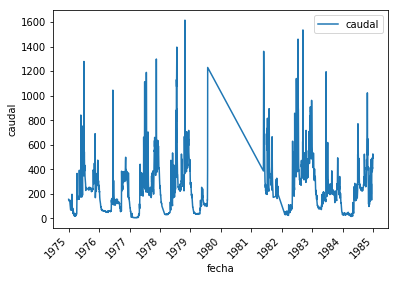

In [19]:
time_plot_una_estacion('caudal', '1975-01-01', '1985-01-01' )

In [21]:
def time_plot_estaciones_varias_columnas(columnas, fecha_min = '2000-01-01', fecha_max = '2000-07-01', codigo_estacion = 7322001):
          
    tmp = df[(df['fecha'] > fecha_min) & (df['fecha'] <= fecha_max)]
    
     
    for index, value in enumerate(columnas):
        
        tmp[columnas[index]] = ( tmp[columnas[index]]- tmp[columnas[index]].mean() )/ np.std(tmp[columnas[index]])
        
        sns.lineplot(x=tmp[tmp['codigo_estacion'] == codigo_estacion]['fecha'], 
                     y=tmp[tmp['codigo_estacion'] == codigo_estacion][columnas[index]], label = columnas[index])
        
        plt.xticks(rotation=45, ha='right')           
        plt.style.use('seaborn')
        plt.rcParams['figure.figsize']= (16, 10)         
                   
                   

In [22]:
aux = ['caudal', 'precip_promedio', 'temp_max_promedio' ]

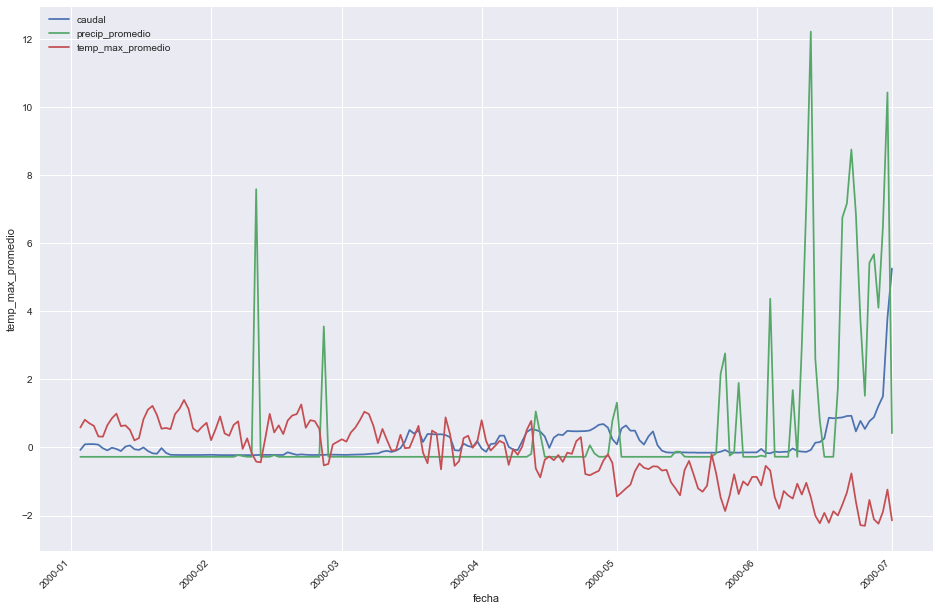

In [81]:
time_plot_estaciones_varias_columnas(aux)

# 4. Crea tres variables llamadas
###         ● caudal_extremo
###         ● temp_extremo
###         ● precip_extremo

Dichas variables toman valor 1 un día si el caudal/temperatura/precipitación (según sea el caso)
observado ese día es extremo. Esto significa que es mayor de lo "esperado". Para capturar esta idea,
el valor de caudal, por ejemplo, toma valor 1 si está sobre el percentil 95 de ese caudal para esa
estación del año (Verano, Primavera, Otoño, Invierno). Toma valor 0 cuando está bajo ese percentil.
En otras palabras, para cada estación de medición y para cada estación del año, debes considerar la
distribución histórica de caudal/temperatura/precipitación para elegir ese percentil 95.

Esta medida toma en cuenta la estacionalidad, pues, por ejemplo, una temperatura de 25 grados en
invierno puede ser extrema, pero en verano es normal. También toma en cuenta que cada cuenca (o
estación) es diferente. Lo que es extremo para una cuenca no lo es para la otra.

¿Les parece razonable esta medida para capturar algo “extremo”? ¿Usarían otra? ¿Cuál? ( Solamente
descríbanla, no la codifiquen! Vamos a usar la definición de Spike para esta desafío)

In [24]:
bins = [0, 91, 183, 275, 366]
labels=['Verano', 'Otoño', 'Invierno', 'Primavera']
doy = df['fecha'].dt.dayofyear
df['estacion_año'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)

In [25]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,estacion_año
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.00,NaN,Verano
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.00,NaN,Otoño
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.00,NaN,Otoño
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.00,NaN,Invierno
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.00,NaN,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411175,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-10 00:00:00+00:00,46.885,7322001,Rio Maule En Longitudinal,0.00,12.975000,Primavera
1411176,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-14 00:00:00+00:00,195.978,7322001,Rio Maule En Longitudinal,0.00,22.665714,Primavera
1411177,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-04 00:00:00+00:00,124.327,7322001,Rio Maule En Longitudinal,1.91,20.757143,Verano
1411178,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-29 00:00:00+00:00,23.682,7322001,Rio Maule En Longitudinal,0.00,27.598333,Verano


In [26]:
df.groupby('estacion_año')['caudal'].quantile(0.95)

estacion_año
Verano       309.0
Otoño        489.0
Invierno     654.0
Primavera    500.0
Name: caudal, dtype: float64

In [27]:
caudal_verano= df.groupby('estacion_año')['caudal'].quantile(0.95)[0]
caudal_otoño= df.groupby('estacion_año')['caudal'].quantile(0.95)[1]
caudal_invierno= df.groupby('estacion_año')['caudal'].quantile(0.95)[2]
caudal_primavera= df.groupby('estacion_año')['caudal'].quantile(0.95)[3]



In [28]:
df['caudal_extremo_verano'] = df[df['estacion_año'] == 'Verano']['caudal'].gt(caudal_verano).astype(int)
df['caudal_extremo_otoño'] = df[df['estacion_año'] == 'Otoño']['caudal'].gt(caudal_otoño).astype(int)
df['caudal_extremo_invierno'] = df[df['estacion_año'] == 'Invierno']['caudal'].gt(caudal_invierno).astype(int)
df['caudal_extremo_primavera'] = df[df['estacion_año'] == 'Primavera']['caudal'].gt(caudal_primavera).astype(int)

In [29]:
df['caudal_extremo_verano'] = df['caudal_extremo_verano'].fillna(0)
df['caudal_extremo_otoño'] = df['caudal_extremo_otoño'].fillna(0)
df['caudal_extremo_invierno'] = df['caudal_extremo_invierno'].fillna(0)
df['caudal_extremo_primavera'] = df['caudal_extremo_primavera'].fillna(0)

In [40]:
df['caudal_extremo_verano'].value_counts()

0.0    1393706
1.0      17474
Name: caudal_extremo_verano, dtype: int64

In [31]:
df['caudal_extremo'] = df['caudal_extremo_verano'] + df['caudal_extremo_otoño'] + df['caudal_extremo_invierno'] + df['caudal_extremo_primavera']

In [ ]:
df['caudal_extremo'].value_counts()

In [32]:
df.groupby('estacion_año')['temp_max_promedio'].quantile(0.95)

estacion_año
Verano       32.000000
Otoño        28.500000
Invierno     26.200001
Primavera    30.200001
Name: temp_max_promedio, dtype: float64

In [171]:
temp_verano= df.groupby('estacion_año')['temp_max_promedio'].quantile(0.95)[0]
temp_otoño= df.groupby('estacion_año')['temp_max_promedio'].quantile(0.95)[1]
temp_invierno= df.groupby('estacion_año')['temp_max_promedio'].quantile(0.95)[2]
temp_primavera= df.groupby('estacion_año')['temp_max_promedio'].quantile(0.95)[3]

In [172]:
df['temp_extremo_verano'] = df[df['estacion_año'] == 'Verano']['temp_max_promedio'].gt(temp_verano).astype(int)
df['temp_extremo_otoño'] = df[df['estacion_año'] == 'Otoño']['temp_max_promedio'].gt(temp_otoño).astype(int)
df['temp_extremo_invierno'] = df[df['estacion_año'] == 'Invierno']['temp_max_promedio'].gt(temp_invierno).astype(int)
df['temp_extremo_primavera'] = df[df['estacion_año'] == 'Primavera']['temp_max_promedio'].gt(temp_primavera).astype(int)

In [178]:
df['temp_extremo_verano'] = df['temp_extremo_verano'].fillna(0)
df['temp_extremo_otoño'] = df['temp_extremo_otoño'].fillna(0)
df['temp_extremo_invierno'] = df['temp_extremo_invierno'].fillna(0)
df['temp_extremo_primavera'] = df['temp_extremo_primavera'].fillna(0)

In [179]:
df['temp_extremo'] = df['temp_extremo_verano'] + df['temp_extremo_otoño'] + df['temp_extremo_invierno'] + df['temp_extremo_primavera']

In [180]:
df['temp_extremo_verano'].value_counts()

0.0    1396129
1.0      15051
Name: temp_extremo_verano, dtype: int64

In [181]:
df['temp_extremo'].value_counts()

0.0    1349385
1.0      61795
Name: temp_extremo, dtype: int64

In [50]:
df.groupby('estacion_año')['precip_promedio'].quantile(0.95)

estacion_año
Verano        3.600000
Otoño        18.000000
Invierno     20.785983
Primavera     6.477778
Name: precip_promedio, dtype: float64

In [51]:
prec_verano= df.groupby('estacion_año')['precip_promedio'].quantile(0.95)[0]
prec_otoño= df.groupby('estacion_año')['precip_promedio'].quantile(0.95)[1]
prec_invierno= df.groupby('estacion_año')['precip_promedio'].quantile(0.95)[2]
prec_primavera= df.groupby('estacion_año')['precip_promedio'].quantile(0.95)[3]

In [52]:
df['prec_extremo_verano'] = df[df['estacion_año'] == 'Verano']['precip_promedio'].gt(prec_verano).astype(int)
df['prec_extremo_otoño'] = df[df['estacion_año'] == 'Otoño']['precip_promedio'].gt(prec_otoño).astype(int)
df['prec_extremo_invierno'] = df[df['estacion_año'] == 'Invierno']['precip_promedio'].gt(prec_invierno).astype(int)
df['prec_extremo_primavera'] = df[df['estacion_año'] == 'Primavera']['precip_promedio'].gt(prec_primavera).astype(int)

In [53]:
df['prec_extremo_verano'] = df['prec_extremo_verano'].fillna(0)
df['prec_extremo_otoño'] = df['prec_extremo_otoño'].fillna(0)
df['prec_extremo_invierno'] = df['prec_extremo_invierno'].fillna(0)
df['prec_extremo_primavera'] = df['prec_extremo_primavera'].fillna(0)

In [54]:
df['prec_extremo'] = df['prec_extremo_verano'] + df['prec_extremo_otoño'] + df['prec_extremo_invierno'] + df['prec_extremo_primavera']

In [55]:
df['prec_extremo_verano'].value_counts()

0.0    1394113
1.0      17067
Name: prec_extremo_verano, dtype: int64

In [56]:
df['prec_extremo'].value_counts()

0.0    1342185
1.0      68995
Name: prec_extremo, dtype: int64

In [183]:
df = df.drop('caudal_extremo_verano', axis=1)
df = df.drop('caudal_extremo_otoño', axis=1)
df = df.drop('caudal_extremo_invierno', axis=1)
df = df.drop('caudal_extremo_primavera', axis=1)

df = df.drop('temp_extremo_verano', axis=1)
df = df.drop('temp_extremo_otoño', axis=1)
df = df.drop('temp_extremo_invierno', axis=1)
df = df.drop('temp_extremo_primavera', axis=1)

df = df.drop('prec_extremo_verano', axis=1)
df = df.drop('prec_extremo_otoño', axis=1)
df = df.drop('prec_extremo_invierno', axis=1)
df = df.drop('prec_extremo_primavera', axis=1)

In [184]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,estacion_año,caudal_extremo,temp_extremo,prec_extremo
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.00,NaN,Verano,0.0,0.0,0.0
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.00,NaN,Otoño,0.0,0.0,0.0
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.00,NaN,Otoño,0.0,0.0,0.0
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.00,NaN,Invierno,0.0,0.0,0.0
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.00,NaN,Invierno,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411175,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-10 00:00:00+00:00,46.885,7322001,Rio Maule En Longitudinal,0.00,12.975000,Primavera,0.0,0.0,0.0
1411176,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-14 00:00:00+00:00,195.978,7322001,Rio Maule En Longitudinal,0.00,22.665714,Primavera,0.0,0.0,0.0
1411177,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-04 00:00:00+00:00,124.327,7322001,Rio Maule En Longitudinal,1.91,20.757143,Verano,0.0,0.0,0.0
1411178,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-29 00:00:00+00:00,23.682,7322001,Rio Maule En Longitudinal,0.00,27.598333,Verano,0.0,0.0,0.0


# 5. Analicen la variable caudal_extremo. Los comportamientos en diferentes cuencas son muy diferentes?

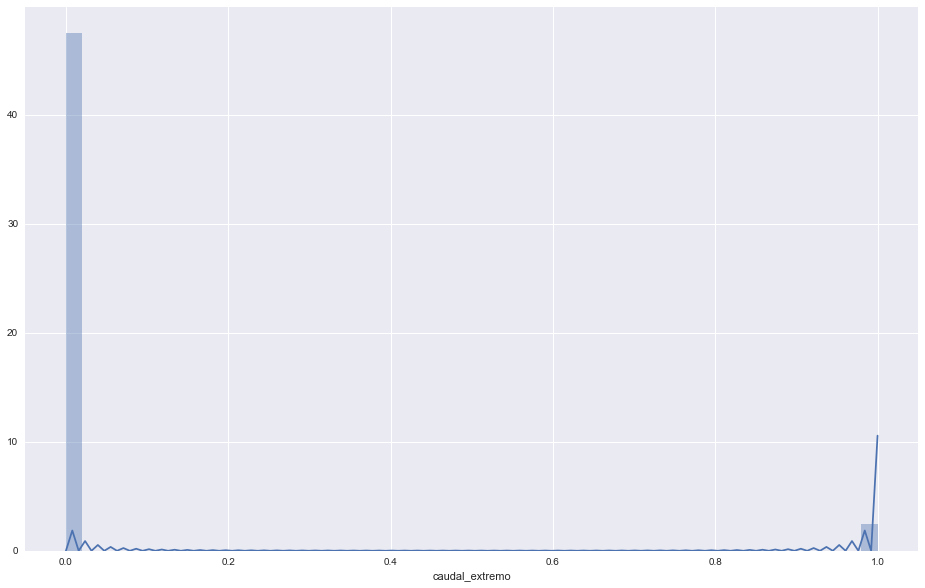

In [59]:
sns.distplot(df['caudal_extremo'])

In [79]:
df[df['codigo_cuenca'] == 73]['caudal_extremo'].value_counts('%')

0.04119325867012931

In [74]:
df[df['codigo_cuenca'] == 83]['caudal_extremo'].value_counts('%')

0.0    0.808548
1.0    0.191452
Name: caudal_extremo, dtype: float64

In [75]:
df[df['codigo_cuenca'] == 21]['caudal_extremo'].value_counts('%')

0.0    1.0
Name: caudal_extremo, dtype: float64

In [76]:
df[df['codigo_cuenca'] == 103]['caudal_extremo'].value_counts('%')

0.0    0.913823
1.0    0.086177
Name: caudal_extremo, dtype: float64

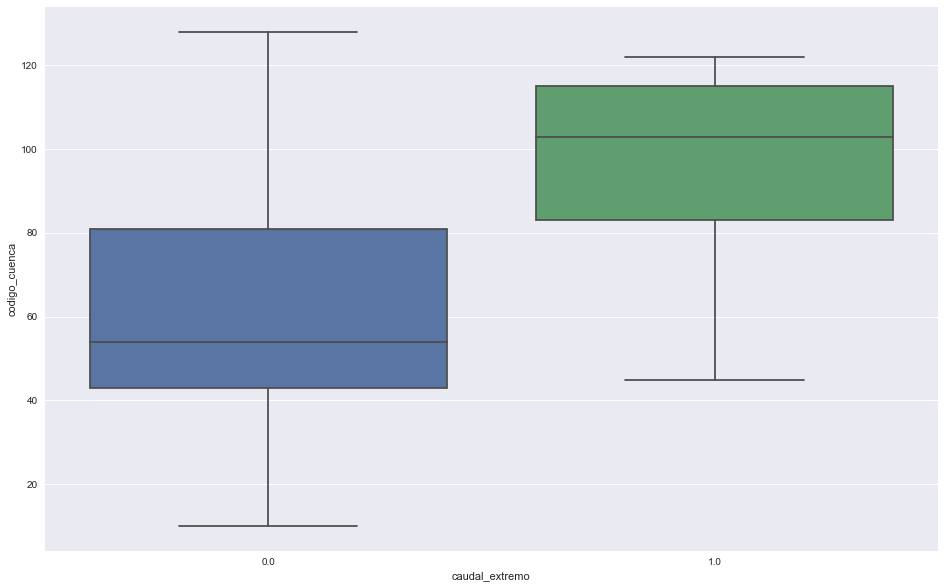

In [67]:
sns.boxplot(x=df['caudal_extremo'], y=df['codigo_cuenca'])

# 6. Hagan un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo, temp_extremo, precip_extremo). 

# Se han vuelto más o menos comunes?

In [143]:
df.groupby('fecha')['caudal_extremo'].value_counts('%')

fecha                      caudal_extremo
1960-01-02 00:00:00+00:00  0.0               1.000000
1960-01-03 00:00:00+00:00  0.0               1.000000
1960-01-04 00:00:00+00:00  0.0               1.000000
1960-01-05 00:00:00+00:00  0.0               1.000000
1960-01-06 00:00:00+00:00  0.0               1.000000
                                               ...   
2018-03-07 00:00:00+00:00  1.0               0.051724
2018-03-08 00:00:00+00:00  0.0               0.929825
                           1.0               0.070175
2018-03-09 00:00:00+00:00  0.0               0.931034
                           1.0               0.068966
Name: caudal_extremo, Length: 35832, dtype: float64

In [ ]:
sns.lineplot(x=tmp[tmp['codigo_estacion'] == codigo_estacion]['fecha'], 
                     y=tmp[tmp['codigo_estacion'] == codigo_estacion][columnas[index]], label = columnas[index])

fecha
1960-01-02 00:00:00+00:00    0.000000
1960-01-03 00:00:00+00:00    0.000000
1960-01-04 00:00:00+00:00    0.000000
1960-01-05 00:00:00+00:00    0.000000
1960-01-06 00:00:00+00:00    0.000000
                               ...   
2018-03-05 00:00:00+00:00    0.068966
2018-03-06 00:00:00+00:00    0.051724
2018-03-07 00:00:00+00:00    0.051724
2018-03-08 00:00:00+00:00    0.070175
2018-03-09 00:00:00+00:00    0.068966
Name: caudal_extremo, Length: 21252, dtype: float64


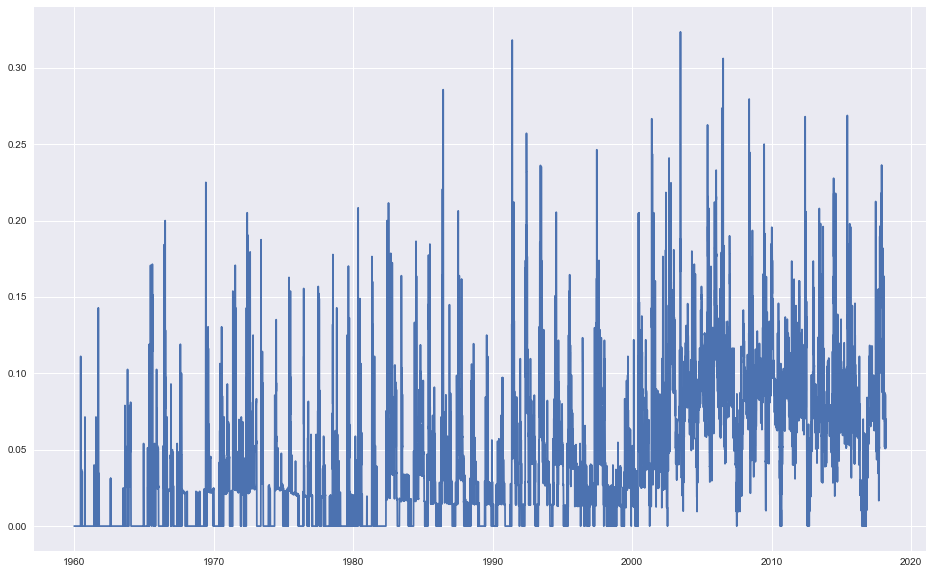

In [185]:
grouped = df.groupby('fecha')['caudal_extremo'].mean()
print(grouped)
#grouped.plot(ylim=(0,.5))
plt.plot(grouped)

fecha
1960-01-02 00:00:00+00:00    0.000000
1960-01-03 00:00:00+00:00    0.000000
1960-01-04 00:00:00+00:00    0.000000
1960-01-05 00:00:00+00:00    0.000000
1960-01-06 00:00:00+00:00    0.000000
                               ...   
2018-03-05 00:00:00+00:00    0.017241
2018-03-06 00:00:00+00:00    0.068966
2018-03-07 00:00:00+00:00    0.034483
2018-03-08 00:00:00+00:00    0.122807
2018-03-09 00:00:00+00:00    0.086207
Name: prec_extremo, Length: 21252, dtype: float64


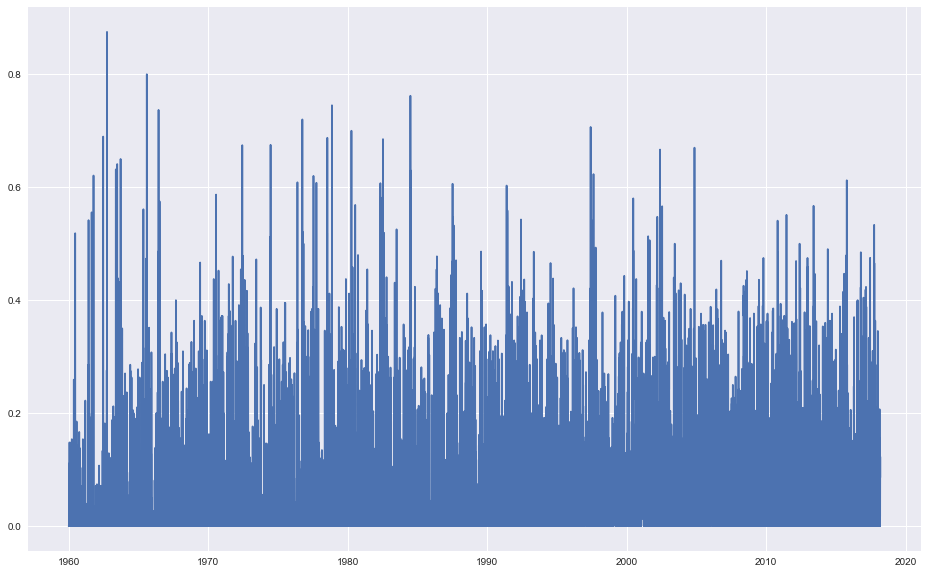

In [186]:
grouped = df.groupby('fecha')['prec_extremo'].mean()
print(grouped)
#grouped.plot(ylim=(0,1))
plt.plot(grouped)

fecha
1960-01-02 00:00:00+00:00    0.000000
1960-01-03 00:00:00+00:00    0.000000
1960-01-04 00:00:00+00:00    0.000000
1960-01-05 00:00:00+00:00    0.000000
1960-01-06 00:00:00+00:00    0.000000
                               ...   
2018-03-05 00:00:00+00:00    0.034483
2018-03-06 00:00:00+00:00    0.137931
2018-03-07 00:00:00+00:00    0.000000
2018-03-08 00:00:00+00:00    0.000000
2018-03-09 00:00:00+00:00    0.034483
Name: temp_extremo, Length: 21252, dtype: float64


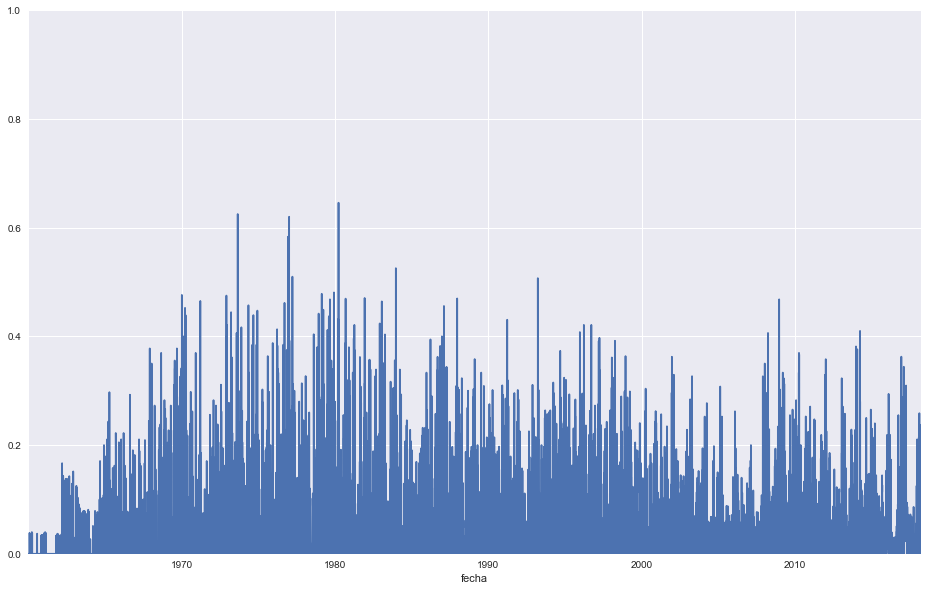

In [147]:
grouped = df.groupby('fecha')['temp_extremo'].mean()
print(grouped)
grouped.plot(ylim=(0,1))

# 7. Predicción de caudal extremo. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de un caudal extremo (la variable binaria caudal_extremo). Siéntete libre de generar variables adicionales y/o complementar con variables externas

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,['prec_extremo', 'temp_extremo']], df['caudal_extremo'], test_size=.33, random_state=11238)

In [165]:
modelo = LogisticRegression().fit(X_train, y_train)

In [166]:
yhat = modelo.predict(X_test)
yhat

array([0., 0., 0., ..., 0., 0., 0.])

# 8. Análisis de resultado del modelo

## a. Qué performance tiene el modelo? Qué métricas usaste para medir esa performance?
## Cuáles son las variables más importantes? Qué opinión te merecen los resultados?

## b. Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos.
## Cuál es la precisión de tu modelo con ese porcentaje de captura? Cuéntanos si te parece útil.

In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [167]:
m1_confusion = confusion_matrix(y_test, yhat)
m1_confusion

array([[442715,      0],
       [ 22975,      0]], dtype=int64)

In [168]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    442715
         1.0       0.00      0.00      0.00     22975

    accuracy                           0.95    465690
   macro avg       0.48      0.50      0.49    465690
weighted avg       0.90      0.95      0.93    465690

